In [1]:
# Logistic Regression example with sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# 1) Generate a synthetic 2D dataset (so we can visualize decision boundary)
X, y = make_classification(
    n_samples=300,    # number of samples
    n_features=2,     # two features for easy plotting
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

In [5]:
# 2) Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

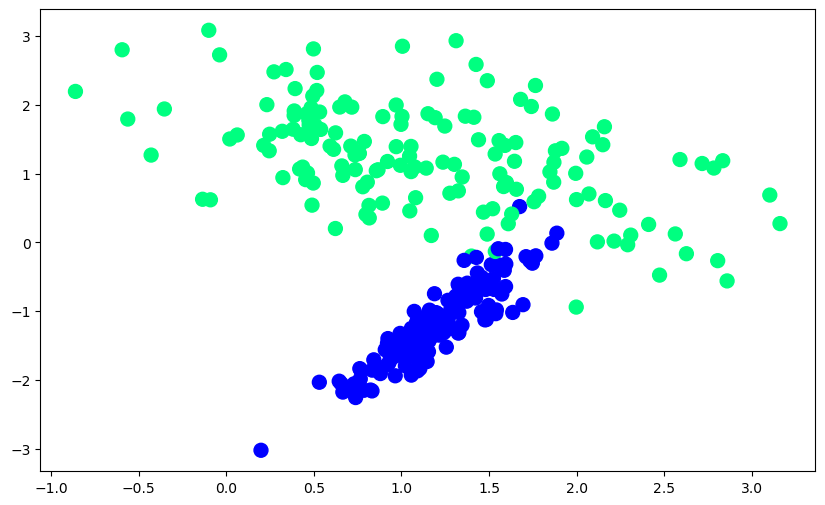

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [6]:
# 3) Standardize features (important for many optimizers and interpretability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train and transform train
X_test_scaled = scaler.transform(X_test)        # transform test using same scaler

In [7]:
# 4) Create and train Logistic Regression model
# solver='liblinear' is good for small datasets; penalty='l2' is default regularization
model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=0)
model.fit(X_train_scaled, y_train)  # fit model to training data

LogisticRegression(random_state=0, solver='liblinear')

In [8]:
# 5) Predict and evaluate
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability for class 1

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 6) Model parameters (weights and intercept)
print("Model intercept (w0):", model.intercept_)
print("Model coefficients (w):", model.coef_)

Accuracy on test set: 0.9777777777777777

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        46

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90

Confusion matrix:
 [[44  0]
 [ 2 44]]
Model intercept (w0): [-0.00809454]
Model coefficients (w): [[0.36652033 4.01328082]]


In [11]:
# 7) Plot decision boundary (for 2D features)
# Create a grid of points covering the data range
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)               # scale grid same as data
probs = model.predict_proba(grid_scaled)[:, 1]     # probability of class 1
probs = probs.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.show()

<Figure size 800x600 with 0 Axes>

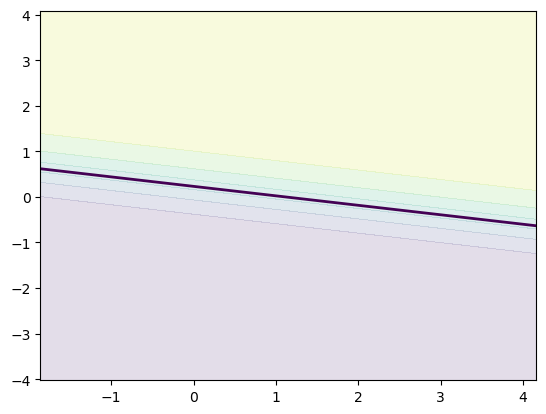

In [18]:
# contour showing probability levels; 0.5 contour is decision boundary
contour = plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, linestyles='-')
plt.contourf(xx, yy, probs, alpha=0.15)            # soft color for probability


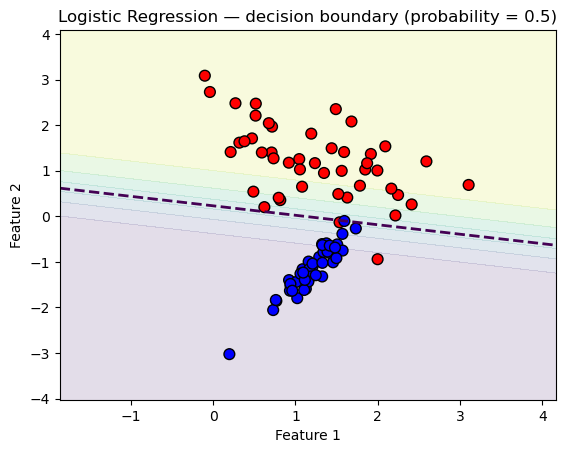

In [17]:

# contour showing probability levels; 0.5 contour is decision boundary
contour = plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, linestyles='--')
plt.contourf(xx, yy, probs, alpha=0.15)            # soft color for probability
# plot test points
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', s=60, cmap='bwr')
plt.title('Logistic Regression — decision boundary (probability = 0.5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()